In [84]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

test

In [85]:
def set_idx(df):
    df['publishedAt'] = pd.to_datetime(df['publishedAt'])
    df.set_index('publishedAt', inplace=True)
    return df

In [86]:
df = pd.read_csv('data/etl_df/df_etl_am1.csv')

In [87]:
df_netflix = pd.read_csv('data/etl_df/df_etl_nflx1.csv')

In [88]:
set_idx(df_netflix)

,title,description,content,results,source2,hour,day,cont_joined,neg,neu,pos,comp,blob,comp_abs,blob_abs,c_b,Sentiment
publishedAt,,,,,,,,,,,,,,,,,
2021-06-14 09:00:00-04:00,Business / Arts Announces Annual Award Recipie...,"TORONTO, June 14, 2021 (GLOBE NEWSWIRE) -- Bus...","TORONTO, June 14, 2021 (GLOBE NEWSWIRE) -- Bus...",25.0,GlobeNewswire,9.0,14.0,Business / Arts Announces Annual Award Recipie...,0.000,0.645,0.355,0.9382,0.200000,1,1,0.738200,1
2021-06-14 09:00:00-04:00,"Video Games Don’t Have To Be So Violent, And E...",When the average person approaches an event li...,When the average person approaches an event li...,25.0,UPROXX,9.0,14.0,"Video Games Don’t Have To Be So Violent, And E...",0.111,0.813,0.076,-0.4576,-0.180952,-1,-1,-0.276648,-1
2021-06-14 09:00:00-04:00,Apple TV 4K (2nd Generation),Apple has broadened its media streaming horizo...,Apple has broadened its media streaming horizo...,25.0,PCMag,9.0,14.0,Apple TV 4K (2nd Generation); Apple has broade...,0.000,1.000,0.000,0.0000,-0.150000,0,-1,0.150000,0
2021-06-14 09:00:10-04:00,‘Centaurworld’: Netflix Drops First Trailer Fo...,Netflix has dropped the first trailer for anim...,Netflix has dropped the first trailer for anim...,25.0,Deadline,9.0,14.0,‘Centaurworld’: Netflix Drops First Trailer Fo...,0.000,1.000,0.000,0.0000,0.125000,0,0,-0.125000,0
2021-06-14 09:00:58-04:00,‘Karma’s World’: Ludacris Talks Animated Netfl...,As part of its Kids and Family Sneak Peek at t...,As part of its Kids and Family Sneak Peek at t...,25.0,Deadline,9.0,14.0,‘Karma’s World’: Ludacris Talks Animated Netfl...,0.000,0.840,0.160,0.8126,0.090909,1,0,0.721691,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-18 15:45:00-04:00,"Gundam Hathaway Producer Teases 2nd Film, But ...",Mobile Suit Gundam Hathaway producer Naohiro O...,Mobile Suit Gundam Hathaway producer Naohiro O...,29.0,Anime News Network,15.0,18.0,"Gundam Hathaway Producer Teases 2nd Film, But ...",0.078,0.867,0.055,-0.0258,0.002778,0,0,-0.028578,0
2021-06-18 15:52:00-04:00,"Two Golden Globes Voters Resign, Calling Holly...",Two Golden Globes voters resigned in protest o...,Two Golden Globes voters resigned in protest o...,29.0,Jezebel,15.0,18.0,"Two Golden Globes Voters Resign, Calling Holly...",0.176,0.824,0.000,-0.7269,0.036508,-1,0,-0.763408,-1
2021-06-18 15:52:46-04:00,"Rurouni Kenshin, the decade’s best live-action...",Rurouni Kenshin is one of the most popular man...,Rurouni Kenshin is one of the most popular man...,29.0,Polygon,15.0,18.0,"Rurouni Kenshin, the decade’s best live-action...",0.103,0.767,0.130,0.3597,0.366667,1,1,-0.006967,1


In [89]:
def resample(df):
    df = df.resample('h').mean()
    df.dropna(inplace=True)
    df=df[~df['hour'].isin([16])].copy()
    df['results'] = df['results'].astype('int')
    return df

# Sentiment Chart

In [106]:
def sent_vol_fig(df_, company):

    df = resample(df_)
    df['roll']=df['Sentiment'].rolling(window=5).mean().dropna()

    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add traces
    fig.add_trace(
      go.Scatter(mode="lines+markers",opacity=1.0,x=df.index, y=df['Sentiment'], name="Sentiment"),
      secondary_y=False, hovertemplate="<br>".join([
          'publishedAt: True', 
          'title:True', 
          'source:True', 
          'comp:True', 
          'Sentiment:True'
      ]
    ))

    fig.add_trace(
      go.Scatter(mode="lines+markers",opacity=1.0,x=df.index, y=df['roll'], name="*Rolling* Sentiment"),
      secondary_y=False,
    )

    fig.add_trace(
      go.Bar(opacity=0.8, x=df.index, y=df['results'], name="Volume"),
      secondary_y=True,
    )

    # Add figure title
    fig.update_layout(
      title_text=f"{company} Sentiment Graph"
    )

    # Set x-axis title
    fig.update_xaxes(title_text="Date - Time")

    # Set y-axes titles
    
    fig.update_yaxes(title_text="<b>Sentiment</b>", secondary_y=False)
    if company!='Netflix':
        fig.update_yaxes(title_text="<b>Volume</b>", secondary_y=True, range=[40,200])
        fig.update_xaxes(rangebreaks=[dict(bounds=[16, 9], pattern="hour")])
    else:
        fig.update_yaxes(title_text="<b>Volume</b>", secondary_y=True, range=[20,150])
        fig.update_xaxes(rangebreaks=[dict(bounds=[16, 9], pattern="hour")])
    
    fig.update_xaxes(rangeslider_visible=True)
    fig.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-106-1ad27408200e>, line 16)

In [91]:
df_netflix.columns

Index(['title', 'description', 'content', 'results', 'source2', 'hour', 'day',
       'cont_joined', 'neg', 'neu', 'pos', 'comp', 'blob', 'comp_abs',
       'blob_abs', 'c_b', 'Sentiment'],
      dtype='object')

In [102]:
sent_vol_fig(df_netflix,'Netflix')

TypeError: add_trace() got an unexpected keyword argument 'hovertemplate'

# Pie Graph

In [9]:
# grouped = df_netflix.groupby(by=['day', 'hour'])['Sentiment'].value_counts()
# grouped = grouped.to_frame()
# grouped

In [10]:
# dummies = pd.get_dummies(df_netflix['Sentiment'])

In [11]:
# df_netflix.merge(dummies, how='left', left_on='publishedAt', right_on='publishedAt')

In [12]:
# df_netflix=df_netflix.reset_index()
# dummies= dummies.reset_index()

In [13]:
# df_netflix.head(3)

In [14]:
# dummies.head(3)

In [15]:
# netflix_dummies = pd.concat([df_netflix, dummies], axis=1)

In [16]:
# netflix_dummies.head()

In [17]:
# netflix_dummies.groupby(by=['day', 'hour']).sum()

In [18]:
# test = netflix_dummies[(netflix_dummies['day']==14) & (netflix_dummies['hour']==14)]

In [19]:
# test.iloc[:,-3:].sum()

In [20]:
# test['Sentiment']=test['Sentiment'].map({-1:'Neg',
#                        0: 'Neu',
#                        1: 'Pos'}).copy()

In [21]:
df_netflix['Sentiment'].value_counts().values

array([551, 286, 197])

In [22]:
df = px.data.tips()

In [23]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [24]:
fig = px.pie(df, values='tip', names='day')
fig.show()

In [25]:
import plotly.graph_objects as go

labels = ['Negative','Neutral','Positive']
values = list(df_netflix['Sentiment'].value_counts().values)

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

## Turning it into a Function

In [26]:
df_hour = df_netflix[(df_netflix['day']==14) & (df_netflix['hour']==14)]
labels = ['Negative','Neutral','Positive']
values = list(df_hour['Sentiment'].value_counts().values)

colors = ['Green', 'yellow', 'Red']
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

In [27]:
def sentiment_hour(df, day):
    df_day = df[df['day']==day]
    labels = ['Postive','Neutral','Negative']
    values = list(df_day['Sentiment'].value_counts().values)
    colors = ['Green', 'yellow', 'Red']
    
    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                      marker=dict(colors=colors, line=dict(color='#000000', width=2)))
    fig.show()

In [28]:
sentiment_hour(df_netflix, 18)

In [29]:
df_netflix[df_netflix['day']==18]['Sentiment'].value_counts()

 1    114
 0     50
-1     36
Name: Sentiment, dtype: int64

## Confirm Pie Graph Accuracy

In [30]:
df_apple1 = pd.read_csv('/Users/ethankunin/Documents/Flatiron/Captstone/Sentiment_Tracker/data/etl_df/df_etl_apple1.csv')

In [31]:
sentiment_hour(df_apple1, 14)

In [32]:
df_apple1[df_apple1['day']==14]['Sentiment'].value_counts()

 1    284
 0    163
-1     53
Name: Sentiment, dtype: int64

# Picking specific days

In [33]:
import datetime
def aceptable_date(date):
    if date == datetime.datetime(2021, 6, 19):
        return ('Please choose weekday')
    else:
        return ('ok')


In [34]:
aceptable_date(datetime.datetime(2021, 6, 19))

'Please choose weekday'

In [35]:
df_netflix.head(3)

,title,description,content,results,source2,hour,day,cont_joined,neg,neu,pos,comp,blob,comp_abs,blob_abs,c_b,Sentiment
publishedAt,,,,,,,,,,,,,,,,,
2021-06-14 09:00:00-04:00,Business / Arts Announces Annual Award Recipie...,"TORONTO, June 14, 2021 (GLOBE NEWSWIRE) -- Bus...","TORONTO, June 14, 2021 (GLOBE NEWSWIRE) -- Bus...",25.0,GlobeNewswire,9.0,14.0,Business / Arts Announces Annual Award Recipie...,0.000,0.645,0.355,0.9382,0.200000,1,1,0.738200,1
2021-06-14 09:00:00-04:00,"Video Games Don’t Have To Be So Violent, And E...",When the average person approaches an event li...,When the average person approaches an event li...,25.0,UPROXX,9.0,14.0,"Video Games Don’t Have To Be So Violent, And E...",0.111,0.813,0.076,-0.4576,-0.180952,-1,-1,-0.276648,-1
2021-06-14 09:00:00-04:00,Apple TV 4K (2nd Generation),Apple has broadened its media streaming horizo...,Apple has broadened its media streaming horizo...,25.0,PCMag,9.0,14.0,Apple TV 4K (2nd Generation); Apple has broade...,0.000,1.000,0.000,0.0000,-0.150000,0,-1,0.150000,0


In [36]:
day = datetime.datetime(2021, 6, 18)

In [37]:
day = day.day

In [38]:
df_netflix[df_netflix['day']==18].shape

(200, 17)

In [39]:
# def show_day(df, day):
#     if week = 'June 14th - June 19th'
#         df = 
#     return df

In [40]:
# show_day(df_netflix, 18)

In [41]:
eighteen = df_netflix[df_netflix['day']==24]

In [42]:
eighteen.iloc[:,[0,1,2,3,-1]]

,title,description,content,results,Sentiment
publishedAt,,,,,


# Highlighting Specific Rows

In [43]:
#https://stackoverflow.com/questions/43596579/how-to-use-python-pandas-stylers-for-coloring-an-entire-row-based-on-a-given-col/43601040
import pandas as pd
import numpy as np

np.random.seed(24)
df = pd.DataFrame({'A': np.linspace(1, 10, 10)})

df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list('BCDE'))],
               axis=1)
df.iloc[0, 2] = np.nan

In [44]:
df

,A,B,C,D,E
0,1.0,1.329212,NaN,-0.316280,-0.990810
1,2.0,-1.070816,-1.438713,0.564417,0.295722
2,3.0,-1.626404,0.219565,0.678805,1.889273
3,4.0,0.961538,0.104011,-0.481165,0.850229
4,5.0,1.453425,1.057737,0.165562,0.515018
5,6.0,-1.336936,0.562861,1.392855,-0.063328
6,7.0,0.121668,1.207603,-0.002040,1.627796
7,8.0,0.354493,1.037528,-0.385684,0.519818
8,9.0,1.686583,-1.325963,1.428984,-2.089354
9,10.0,-0.129820,0.631523,-0.586538,0.290720


In [45]:
def highlight_greaterthan(s, threshold, column):
    is_max = pd.Series(data=False, index=s.index)
    is_max[column] = s.loc[column] >= threshold
    return ['background-color: yellow' if is_max.any() else '' for v in is_max]


df.style.apply(highlight_greaterthan, threshold=1.0, column=['C', 'B'], axis=1)

,A,B,C,D,E
0,1.000000,1.329212,nan,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,-0.481165,0.850229
4,5.000000,1.453425,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,0.290720


<AxesSubplot:ylabel='Frequency'>

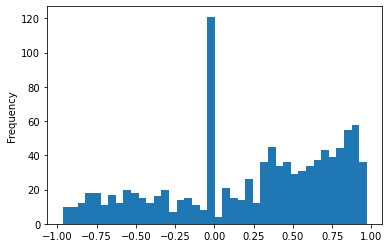

In [46]:
df_netflix['comp'].plot(kind='hist', bins=40)

In [47]:
(df_netflix['comp']>0.90).value_counts()

False    968
True      66
Name: comp, dtype: int64

In [48]:
(df_netflix['comp']<-0.75).value_counts()

False    975
True      59
Name: comp, dtype: int64

In [49]:
def highlight(s):
    if s['comp'] > 0.2:
        return 'background-color: yellow'
    else:
        return 'background-color: white'

In [50]:
df_netflix.apply(highlight, axis=1)

publishedAt
2021-06-14 09:00:00-04:00    background-color: yellow
2021-06-14 09:00:00-04:00     background-color: white
2021-06-14 09:00:00-04:00     background-color: white
2021-06-14 09:00:10-04:00     background-color: white
2021-06-14 09:00:58-04:00    background-color: yellow
                                       ...           
2021-06-18 15:45:00-04:00     background-color: white
2021-06-18 15:52:00-04:00     background-color: white
2021-06-18 15:52:46-04:00    background-color: yellow
2021-06-18 15:53:00-04:00     background-color: white
2021-06-18 15:54:00-04:00    background-color: yellow
Length: 1034, dtype: object

In [51]:
df_netflix

,title,description,content,results,source2,hour,day,cont_joined,neg,neu,pos,comp,blob,comp_abs,blob_abs,c_b,Sentiment
publishedAt,,,,,,,,,,,,,,,,,
2021-06-14 09:00:00-04:00,Business / Arts Announces Annual Award Recipie...,"TORONTO, June 14, 2021 (GLOBE NEWSWIRE) -- Bus...","TORONTO, June 14, 2021 (GLOBE NEWSWIRE) -- Bus...",25.0,GlobeNewswire,9.0,14.0,Business / Arts Announces Annual Award Recipie...,0.000,0.645,0.355,0.9382,0.200000,1,1,0.738200,1
2021-06-14 09:00:00-04:00,"Video Games Don’t Have To Be So Violent, And E...",When the average person approaches an event li...,When the average person approaches an event li...,25.0,UPROXX,9.0,14.0,"Video Games Don’t Have To Be So Violent, And E...",0.111,0.813,0.076,-0.4576,-0.180952,-1,-1,-0.276648,-1
2021-06-14 09:00:00-04:00,Apple TV 4K (2nd Generation),Apple has broadened its media streaming horizo...,Apple has broadened its media streaming horizo...,25.0,PCMag,9.0,14.0,Apple TV 4K (2nd Generation); Apple has broade...,0.000,1.000,0.000,0.0000,-0.150000,0,-1,0.150000,0
2021-06-14 09:00:10-04:00,‘Centaurworld’: Netflix Drops First Trailer Fo...,Netflix has dropped the first trailer for anim...,Netflix has dropped the first trailer for anim...,25.0,Deadline,9.0,14.0,‘Centaurworld’: Netflix Drops First Trailer Fo...,0.000,1.000,0.000,0.0000,0.125000,0,0,-0.125000,0
2021-06-14 09:00:58-04:00,‘Karma’s World’: Ludacris Talks Animated Netfl...,As part of its Kids and Family Sneak Peek at t...,As part of its Kids and Family Sneak Peek at t...,25.0,Deadline,9.0,14.0,‘Karma’s World’: Ludacris Talks Animated Netfl...,0.000,0.840,0.160,0.8126,0.090909,1,0,0.721691,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-18 15:45:00-04:00,"Gundam Hathaway Producer Teases 2nd Film, But ...",Mobile Suit Gundam Hathaway producer Naohiro O...,Mobile Suit Gundam Hathaway producer Naohiro O...,29.0,Anime News Network,15.0,18.0,"Gundam Hathaway Producer Teases 2nd Film, But ...",0.078,0.867,0.055,-0.0258,0.002778,0,0,-0.028578,0
2021-06-18 15:52:00-04:00,"Two Golden Globes Voters Resign, Calling Holly...",Two Golden Globes voters resigned in protest o...,Two Golden Globes voters resigned in protest o...,29.0,Jezebel,15.0,18.0,"Two Golden Globes Voters Resign, Calling Holly...",0.176,0.824,0.000,-0.7269,0.036508,-1,0,-0.763408,-1
2021-06-18 15:52:46-04:00,"Rurouni Kenshin, the decade’s best live-action...",Rurouni Kenshin is one of the most popular man...,Rurouni Kenshin is one of the most popular man...,29.0,Polygon,15.0,18.0,"Rurouni Kenshin, the decade’s best live-action...",0.103,0.767,0.130,0.3597,0.366667,1,1,-0.006967,1


In [52]:
df.dropna(inplace=True)

In [53]:
num = 7
def highlight(s):

    if s['comp'] > 0.90:
        return ['background-color: green']*num
    elif s['comp'] < -0.80:
        return ['background-color: red']*num
    else:
        return ['background-color: white']*num

In [54]:
df_netflix

,title,description,content,results,source2,hour,day,cont_joined,neg,neu,pos,comp,blob,comp_abs,blob_abs,c_b,Sentiment
publishedAt,,,,,,,,,,,,,,,,,
2021-06-14 09:00:00-04:00,Business / Arts Announces Annual Award Recipie...,"TORONTO, June 14, 2021 (GLOBE NEWSWIRE) -- Bus...","TORONTO, June 14, 2021 (GLOBE NEWSWIRE) -- Bus...",25.0,GlobeNewswire,9.0,14.0,Business / Arts Announces Annual Award Recipie...,0.000,0.645,0.355,0.9382,0.200000,1,1,0.738200,1
2021-06-14 09:00:00-04:00,"Video Games Don’t Have To Be So Violent, And E...",When the average person approaches an event li...,When the average person approaches an event li...,25.0,UPROXX,9.0,14.0,"Video Games Don’t Have To Be So Violent, And E...",0.111,0.813,0.076,-0.4576,-0.180952,-1,-1,-0.276648,-1
2021-06-14 09:00:00-04:00,Apple TV 4K (2nd Generation),Apple has broadened its media streaming horizo...,Apple has broadened its media streaming horizo...,25.0,PCMag,9.0,14.0,Apple TV 4K (2nd Generation); Apple has broade...,0.000,1.000,0.000,0.0000,-0.150000,0,-1,0.150000,0
2021-06-14 09:00:10-04:00,‘Centaurworld’: Netflix Drops First Trailer Fo...,Netflix has dropped the first trailer for anim...,Netflix has dropped the first trailer for anim...,25.0,Deadline,9.0,14.0,‘Centaurworld’: Netflix Drops First Trailer Fo...,0.000,1.000,0.000,0.0000,0.125000,0,0,-0.125000,0
2021-06-14 09:00:58-04:00,‘Karma’s World’: Ludacris Talks Animated Netfl...,As part of its Kids and Family Sneak Peek at t...,As part of its Kids and Family Sneak Peek at t...,25.0,Deadline,9.0,14.0,‘Karma’s World’: Ludacris Talks Animated Netfl...,0.000,0.840,0.160,0.8126,0.090909,1,0,0.721691,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-18 15:45:00-04:00,"Gundam Hathaway Producer Teases 2nd Film, But ...",Mobile Suit Gundam Hathaway producer Naohiro O...,Mobile Suit Gundam Hathaway producer Naohiro O...,29.0,Anime News Network,15.0,18.0,"Gundam Hathaway Producer Teases 2nd Film, But ...",0.078,0.867,0.055,-0.0258,0.002778,0,0,-0.028578,0
2021-06-18 15:52:00-04:00,"Two Golden Globes Voters Resign, Calling Holly...",Two Golden Globes voters resigned in protest o...,Two Golden Globes voters resigned in protest o...,29.0,Jezebel,15.0,18.0,"Two Golden Globes Voters Resign, Calling Holly...",0.176,0.824,0.000,-0.7269,0.036508,-1,0,-0.763408,-1
2021-06-18 15:52:46-04:00,"Rurouni Kenshin, the decade’s best live-action...",Rurouni Kenshin is one of the most popular man...,Rurouni Kenshin is one of the most popular man...,29.0,Polygon,15.0,18.0,"Rurouni Kenshin, the decade’s best live-action...",0.103,0.767,0.130,0.3597,0.366667,1,1,-0.006967,1


In [55]:
df_netflix = df_netflix.reset_index()

In [56]:
nstyled = df_netflix.style.apply(highlight, axis=1)

In [57]:
df_hour

,title,description,content,results,source2,hour,day,cont_joined,neg,neu,pos,comp,blob,comp_abs,blob_abs,c_b,Sentiment
publishedAt,,,,,,,,,,,,,,,,,
2021-06-14 14:00:30-04:00,‘Perfect Strangers’: Robin Thede & London Hugh...,"Perfect Strangers, the 1980s sitcom starring M...","Perfect Strangers, the 1980s sitcom starring M...",40.0,Deadline,14.0,14.0,‘Perfect Strangers’: Robin Thede & London Hugh...,0.000,0.838,0.162,0.8271,0.666667,1,1,0.160433,1
2021-06-14 14:00:50-04:00,‘The Umbrella Academy’ VFX Supervisor Everett ...,For the second season of Netflix’sThe Umbrella...,For the second season of Netflix’sThe Umbrella...,40.0,Deadline,14.0,14.0,‘The Umbrella Academy’ VFX Supervisor Everett ...,0.000,0.968,0.032,0.1531,0.000000,0,0,0.153100,0
2021-06-14 14:00:54-04:00,Netflix’s ‘Élite Short Stories’ Packs More Dra...,Ever since it premiered on Netflix back in 201...,Ever since it premiered on Netflix back in 201...,40.0,Decider,14.0,14.0,Netflix’s ‘Élite Short Stories’ Packs More Dra...,0.191,0.696,0.113,-0.7003,0.234375,-1,1,-0.934675,-1
2021-06-14 14:00:56-04:00,Paramount+ is a Waste of Money and I Shouldn't...,ViacomCBSI did it. I purchased Paramount+ at t...,ViacomCBSI did it. I purchased Paramount+ at t...,40.0,Reviewgeek,14.0,14.0,Paramount+ is a Waste of Money and I Shouldn't...,0.060,0.851,0.089,0.3400,0.229464,1,1,0.110536,1
2021-06-14 14:08:14-04:00,Goldman Sachs says buy these 37 stocks that wi...,In the era of cryptocurrencies and meme stocks...,In the era of cryptocurrencies and meme stocks...,40.0,Business Insider,14.0,14.0,Goldman Sachs says buy these 37 stocks that wi...,0.034,0.833,0.132,0.7184,0.160417,1,1,0.557983,1
2021-06-14 14:11:00-04:00,Big Mouth spinoff Human Resources voice cast r...,Attention all of your Big Mouth fans out there...,Attention all of your Big Mouth fans out there...,40.0,JoBlo,14.0,14.0,Big Mouth spinoff Human Resources voice cast r...,0.000,0.938,0.062,0.3612,0.000000,1,0,0.361200,1
2021-06-14 14:13:03-04:00,Locksmith Animation Taps Simon Otto to Direct ...,Locksmith Animation has tapped Simon Otto to d...,Locksmith Animation has tapped Simon Otto to d...,40.0,Variety,14.0,14.0,Locksmith Animation Taps Simon Otto to Direct ...,0.000,1.000,0.000,0.0000,0.100000,0,0,-0.100000,0
2021-06-14 14:13:27-04:00,Naomi Watts & Bobby Cannavale To Headline ‘The...,EXCLUSIVE: Naomi Watts and Bobby Cannavale are...,EXCLUSIVE: Naomi Watts and Bobby Cannavale are...,40.0,Deadline,14.0,14.0,Naomi Watts & Bobby Cannavale To Headline ‘The...,0.084,0.866,0.050,-0.1449,0.014286,0,0,-0.159186,0
2021-06-14 14:15:00-04:00,Resident Evil: Infinite Darkness spreads openi...,While a live-action Resident Evil television s...,While a live-action Resident Evil television s...,40.0,JoBlo,14.0,14.0,Resident Evil: Infinite Darkness spreads openi...,0.307,0.693,0.000,-0.9476,-1.000000,-1,-1,0.052400,-1


In [58]:
df_hour.index.duplicated().sum()

0

In [59]:
def reset_index_version_remove_cols(df):
    df = df.reset_index()
    df.drop(columns=['description', 'content', 'results', 'hour', 'day', 'cont_joined', 'neg', 'neu',
                    'pos', 'blob', 'comp_abs', 'blob_abs', 'c_b', 'index'], inplace=True)
    df.rename(columns={'source2': 'source'}, inplace=True)
    return df

In [60]:
df_netflix = reset_index_version_remove_cols(df_netflix)

In [61]:
df_netflix

,publishedAt,title,source,comp,Sentiment
0,2021-06-14 09:00:00-04:00,Business / Arts Announces Annual Award Recipie...,GlobeNewswire,0.9382,1
1,2021-06-14 09:00:00-04:00,"Video Games Don’t Have To Be So Violent, And E...",UPROXX,-0.4576,-1
2,2021-06-14 09:00:00-04:00,Apple TV 4K (2nd Generation),PCMag,0.0000,0
3,2021-06-14 09:00:10-04:00,‘Centaurworld’: Netflix Drops First Trailer Fo...,Deadline,0.0000,0
4,2021-06-14 09:00:58-04:00,‘Karma’s World’: Ludacris Talks Animated Netfl...,Deadline,0.8126,1
...,...,...,...,...,...
1029,2021-06-18 15:45:00-04:00,"Gundam Hathaway Producer Teases 2nd Film, But ...",Anime News Network,-0.0258,0
1030,2021-06-18 15:52:00-04:00,"Two Golden Globes Voters Resign, Calling Holly...",Jezebel,-0.7269,-1
1031,2021-06-18 15:52:46-04:00,"Rurouni Kenshin, the decade’s best live-action...",Polygon,0.3597,1
1032,2021-06-18 15:53:00-04:00,Castlevania Advance Collection Pops Up On Aust...,GameSpot,0.0000,0


# Plot Feature Importances

In [62]:
import joblib
apple1_be = joblib.load('grid_estimator_models/apple1_bp.pkl')

/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning:

Trying to unpickle estimator TfidfTransformer from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.

/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning:

Trying to unpickle estimator TfidfVectorizer from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.

/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning:

Trying to unpickle estimator DecisionTreeClassifier from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.

/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning:

Trying to unpickle estimator R

In [63]:
apple1_be.named_steps['text_pipe']

TfidfVectorizer(input=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern="([a-zA-Z]+(?:'[a-z]+)?)", gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>,
                min_df=0.01, ngram_range=(1, 2), stop_words='english')

In [64]:
vect = apple1_be.named_steps['text_pipe']
clf = apple1_be.named_steps['clf']

In [65]:
clf

RandomForestClassifier(class_weight='balanced', max_depth=200, n_jobs=-1)

In [66]:
importance = pd.Series(clf.feature_importances_,
                      index=vect.get_feature_names())

In [67]:
importance

000          0.001656
10           0.004187
11           0.001984
12           0.002140
13           0.000811
               ...   
years        0.007266
york         0.002902
york city    0.001136
youre        0.001600
youtube      0.000897
Length: 425, dtype: float64

In [68]:
importance=importance.sort_values(ascending=False).to_frame()

In [69]:
importance

,0
apple,0.020411
best,0.018409
new,0.015893
like,0.011912
free,0.009049
...,...
cnet,0.000300
early prime,0.000286
rudd,0.000270
echo,0.000234


In [70]:
importance = importance.nlargest(30, columns=0)

In [71]:
importance

,0
apple,0.020411
best,0.018409
new,0.015893
like,0.011912
free,0.009049
2021,0.008584
big,0.008257
day,0.008087
support,0.007534
years,0.007266


In [72]:
importance=importance.sort_values(by=0, ascending=True)

In [73]:
importance

,0
according,0.005036
today,0.005131
online,0.005246
tv,0.005302
june,0.005385
markets,0.005391
coming,0.005402
man,0.005470
time,0.005546
week,0.005608


In [74]:
importance.drop('apple', inplace=True)

In [75]:
importance.head()
importance.rename(columns={0:'Sentiment Importance'}, inplace=True)

In [76]:
fig = px.bar(importance, y=importance.index, x='Sentiment Importance', orientation='h')
layout1 = go.Layout(
title={
        'text': f"Week of : Most Impactful Words for Driving Sentiment for ",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        },
yaxis=dict(
           tickvals=importance.index,
    title='Commmon Words',
    ))
fig.update_layout(layout1)
fig.show()

## Functionzie Plotly Fig

In [77]:
import joblib

def feat_imp_fig(pkl_file, company, week):

    # Load in pickle file
    comp_be = pkl_file

    # Create vector + clf
    vect = comp_be.named_steps['text_pipe']
    clf = comp_be.named_steps['clf']

    # Feature Importance Series
    importance = pd.Series(clf.feature_importances_,
                          index=vect.get_feature_names())

    importance=importance.sort_values(ascending=False).to_frame()
    importance = importance.nlargest(30, columns=0)
    importance=importance.sort_values(by=0, ascending=True)

    # Remove company name
    importance.drop(company, inplace=True)

    # Rename column
    importance.rename(columns={0:'Sentiment Importance'}, inplace=True)

    # Create Plotly fig
    fig = px.bar(importance, y=importance.index, x='Sentiment Importance', orientation='h')
    layout1 = go.Layout(
    title={
        'text': f"Week of {week}: Most Impactful Words for Driving Sentiment for {company.capitalize()}",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        },
    yaxis=dict(
               tickvals=importance.index,
        title='Commmon Words',
        ))
    fig.update_layout(layout1)
    fig.show()

## Testing Feature Importance

In [78]:
## Apple Week1 vs. Week2

In [107]:
am1 = joblib.load('grid_estimator_models/am1_bp.pkl')


/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning:

Trying to unpickle estimator TfidfTransformer from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.

/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning:

Trying to unpickle estimator TfidfVectorizer from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.

/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning:

Trying to unpickle estimator DecisionTreeClassifier from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.

/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning:

Trying to unpickle estimator R

In [108]:
feat_imp_fig(am1, 'netflix', 'wk1')

AttributeError: 'GridSearchCV' object has no attribute 'named_steps'

In [ ]:
df_netflix[df_netflix['']]

In [ ]:
ls

In [ ]:
df = pd.read_csv('/Users/ethankunin/Documents/Flatiron/Captstone/Sentiment_Tracker/data/etl_df/df_etl_nflx1.csv')

# Polarizing Articles

In [ ]:
df = df[df['day']==14].copy()

In [ ]:
df.drop(columns=['description', 'content', 'results', 'hour', 'day', 'cont_joined', 'neg',
                'neu', 'pos', 'blob', 'blob_abs', 'c_b', 'comp_abs'], inplace=True)

In [ ]:
df

In [ ]:
def set_idx(df):
    df['publishedAt'] = pd.to_datetime(df['publishedAt'])
    df.set_index('publishedAt', inplace=True)
    return df

In [ ]:
df = set_idx(df)

In [ ]:
df.rename(columns={'title':'Headline', 'source2':'Source'}, inplace=True)

In [ ]:
df

In [ ]:
df['comp'].quantile(0.90)

In [ ]:
df['comp'].quantile(0.10)

In [ ]:
df = df[(df['comp']>=df['comp'].quantile(0.90)) | (df['comp']<=df['comp'].quantile(0.10))].copy()

In [ ]:
df.drop(columns=['comp', 'comp_abs'], inplace=True)

In [ ]:
num = df.shape[1]
def highlight_1(s):

    if s['Sentiment'] > 0:
        return ['background-color: mediumseagreen']*num
    else:
        return ['background-color: lightcoral']*num

In [ ]:
df = df.reset_index()

In [ ]:
df.style.apply(highlight_1, axis=1)

In [ ]:
df.shape[1]

## Functionize Polarizing Articles

In [ ]:
def prep_for_color(df):
    
    # Drop duplicates
    df.drop_duplicates(subset=['title', 'source2', 'publishedAt'], inplace=True)

    # Drop unnecessary comments
    df.drop(columns=['description', 'content', 'results', 'hour', 'day', 'cont_joined', 'neg',
                    'neu', 'pos', 'blob', 'blob_abs', 'c_b', 'comp_abs'], inplace=True)

    # Pull out most polarizing
    df = df[(df['comp']>=df['comp'].quantile(0.90)) | (df['comp']<=df['comp'].quantile(0.10))].copy()

    # Drop additional columns
    df.drop(columns=['comp'], inplace=True)
    
    # Rename columns
    df.rename(columns={'title':'Headline', 'source2':'Source'}, inplace=True)
    
    return df

In [ ]:
df.head(3)

In [ ]:
df = prep_for_color(df)

In [ ]:
df

In [ ]:
num = df.shape[1]
def highlight_1(s):

    if s['Sentiment'] > 0:
        return ['background-color: mediumseagreen']*num
    else:
        return ['background-color: lightcoral']*num

In [ ]:
df = df.style.apply(highlight_1, axis=1)

In [ ]:
df

In [ ]:
len(df)

In [ ]:
df = pd.read_csv('/Users/ethankunin/Documents/Flatiron/Captstone/Sentiment_Tracker/data/etl_df/df_etl_apple1.csv')

In [ ]:
df.drduplicated(subset=['title', 'source2', 'publishedAt']).sum()

In [ ]:
len(df)

In [ ]:
91/2388